In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset,metadata=tfds.load('imdb_reviews/subwords8k',as_supervised=True,with_info=True)

In [0]:
train_data,test_data=dataset['train'],dataset['test']

In [4]:
metadata

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [0]:
encoder=metadata.features['text'].encoder

In [0]:
train_data=train_data.shuffle(metadata.splits['train'].num_examples).padded_batch(32)

In [0]:
test_data=test_data.padded_batch(32)

In [0]:
model=tf.keras.Sequential([tf.keras.layers.Embedding(encoder.vocab_size,16),tf.keras.layers.GlobalAveragePooling1D(),tf.keras.layers.Dense(1)])

In [0]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [11]:
h=model.fit(train_data,epochs=30,validation_data=test_data)

Epoch 1/30
782/782 [==============================] - 11s 14ms/step - loss: 0.6272 - accuracy: 0.7796 - val_loss: 0.5918 - val_accuracy: 0.7654
Epoch 2/30
782/782 [==============================] - 11s 14ms/step - loss: 0.5331 - accuracy: 0.8138 - val_loss: 0.5031 - val_accuracy: 0.8298
Epoch 3/30
782/782 [==============================] - 11s 14ms/step - loss: 0.4633 - accuracy: 0.8481 - val_loss: 0.4707 - val_accuracy: 0.8502
Epoch 4/30
782/782 [==============================] - 11s 14ms/step - loss: 0.4134 - accuracy: 0.8727 - val_loss: 0.4447 - val_accuracy: 0.8596
Epoch 5/30
782/782 [==============================] - 11s 14ms/step - loss: 0.3843 - accuracy: 0.8795 - val_loss: 0.4334 - val_accuracy: 0.8632
Epoch 6/30
782/782 [==============================] - 11s 14ms/step - loss: 0.3546 - accuracy: 0.8927 - val_loss: 0.4191 - val_accuracy: 0.8694
Epoch 7/30
782/782 [==============================] - 11s 14ms/step - loss: 0.3370 - accuracy: 0.8975 - val_loss: 0.4131 - val_accuracy:

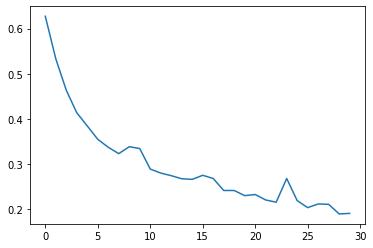

In [12]:
plt.plot(h.history['loss'])

In [13]:
for tx,lbl in test_data.take(25):
  prediction=model.predict(tx)

In [18]:
np.argmax(prediction[4])

0

In [21]:
lbl[4].numpy()

0